## Импортируем нужные библиотеки

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

## Загружаем данные

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(iris.data[:, 2:], columns=['p_1', 'p_2'])
data['target'] = iris.target
data.head()

,p_1,p_2,target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


## Функция для отрисовки граници разделения классов

In [ ]:
def plot_ex(df, name_x1, name_x2, fun):
    x_min, x_max = df[name_x1].min() - 5, df[name_x1].max() + 5
    y_min, y_max = df[name_x2].min() - 5, df[name_x2].max() + 5

    h = .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = fun(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(7,7))
    plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Pastel1)

    sns.scatterplot(x=df[name_x1], y=df[name_x2], hue=df['target'], palette=['#00aa00','#0000ff','#aa00aa'])
    plt.xlabel(name_x1)
    plt.ylabel(name_x2)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks()
    plt.show()

## Подберем параметры модели

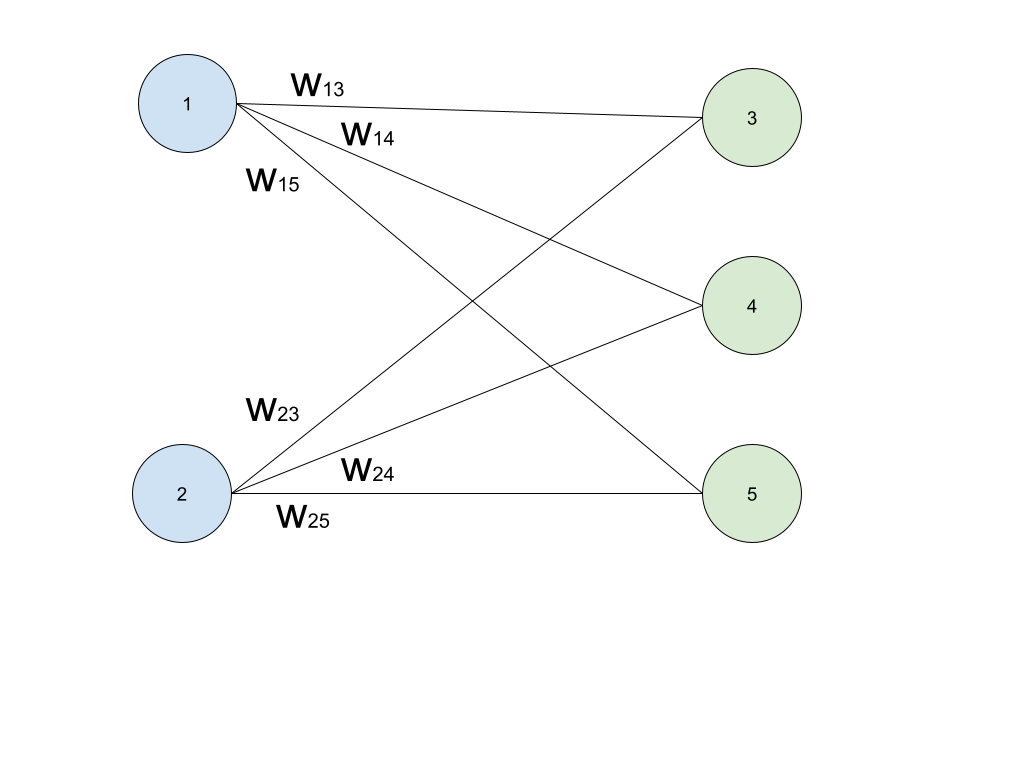

### Модель
Модель состоит из входного слоя с четырьмя входами (у нас всего 4 признака) и из выходного слоя с тремя нейронами (по одному на каждый класс).

Для выходных нейронов значения определяется формулой

$f_i = w_{1i} x_1 + w_{2i} x_2 + b_i$

где $i$ - номер нейрона

Каждый выходной нейрон отвечает за свой класс

Что бы перевести значения на выходе из нейронов к вероятностям классов испоьзуем функцию softmax, 

$softmax(f)_j = \frac{e^{f_j}}{\sum_{i=1}^n e^{f_i}}$


Итоговый класс определяется максимальной вероятностью

$f(x_1,x_2) = softmax(f_3,f_4,f_5)$

Задача в том, чтобы подобрать такие 

$w_{13}$, $w_{23}$,  $b_3$,

$w_{14}$, $w_{24}$,  $b_4$,

$w_{15}$, $w_{25}$,  $b_5$

, что бы модель давала верный прогноз по всем случаям

Имейте ввиду, что правильных решений множество и тут представлено простое решение.


In [ ]:
# Подбираем значения параметров модели
# =====================
# w13 = 0.5
# w14 = 0.75
# w15 = 0.9
# w23 = -0.25
# w24 = 0.1
# w25 = 0.5
# b3  = 2.25
# b4  = 1.26
# b5  = -0.1
# Имейте ввиду, что правильных решений множество и тут представлено простое решение.
# =====================

# функция описывающая работу нашей модели 
# здесь х это массив пар значений признаков
# вида [[0.1, 0.2]
#      [1.3, 3.1]
#      [2.1, 1.2]
#      ...       ]

def func(w13, w14, w15, w23, w24, w25, b3, b4, b5):

    def softmax(x):
        return np.exp(x)/np.sum(np.exp(x))

    def f(x):
        f3 = w13*x[:,0]+w23*x[:,1]+b3
        f4 = w14*x[:,0]+w24*x[:,1]+b4
        f5 = w15*x[:,0]+w25*x[:,1]+b5
        res = softmax(np.vstack([f3, f4, f5]).T)
        return  np.argmax(res, axis=1)

    # Сделаем прогноз 
    data['pred'] = f(data[['p_1', 'p_2']].to_numpy())

    # Нарисуем границу разделения классов и выведем результат предсказания
    plot_ex(data, 'p_1', 'p_2', f)
    print(f"Доля верных ответов: {sum(data['target'] == data['pred'])/data.shape[0]}")

val_range = (-10,10,0.05)
y=interactive(func, 
              w13=val_range, 
              w14=val_range, 
              w15=val_range, 
              w23=val_range, 
              w24=val_range, 
              w25=val_range, 
              b3=val_range, 
              b4=val_range, 
              b5=val_range
              )
display(y)

interactive(children=(FloatSlider(value=0.0, description='w13', max=10.0, min=-10.0, step=0.05), FloatSlider(v…

In [ ]:
data

,p_1,p_2,target,pred
0,1.4,0.2,0,0
1,1.4,0.2,0,0
2,1.3,0.2,0,0
3,1.5,0.2,0,0
4,1.4,0.2,0,0
...,...,...,...,...
145,5.2,2.3,2,2
146,5.0,1.9,2,2
147,5.2,2.0,2,2
148,5.4,2.3,2,2
